In [124]:
# Import modules!
import numpy as np
import pandas as pd
import sqlalchemy
import matplotlib.pyplot as plt
import sqlite3
%load_ext sql

%sql sqlite:///videogames.db
conn = sqlite3.connect('videogames.db')


#Uploading the csv
videogames = pd.read_csv('VIDEOGAMESSALES.csv')
videogames.count()



The sql extension is already loaded. To reload it, use:
  %reload_ext sql


ProductID       16598
Name            16598
Platform        16598
PlatformID      16598
Year            16327
Genre           16598
GenreID         16598
Publisher       16540
PublisherID     16598
NA_Sales        16598
EU_Sales        16598
JP_Sales        16598
Other_Sales     16598
Global_Sales    16598
dtype: int64

In [125]:
# Descriptive Statistic of The Dataset 
videogames.describe(include='all')

,ProductID,Name,Platform,PlatformID,Year,Genre,GenreID,Publisher,PublisherID,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598,16598,16598.000000,16327.000000,16598,16598.000000,16540,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
unique,NaN,11493,31,NaN,NaN,12,NaN,578,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,NaN,Action,NaN,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2163,NaN,NaN,3316,NaN,1351,NaN,NaN,NaN,NaN,NaN,NaN
mean,8300.605254,NaN,NaN,8299.500000,2006.406443,NaN,8299.500000,NaN,8299.500000,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,NaN,NaN,4791.574219,5.828981,NaN,4791.574219,NaN,4791.574219,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,NaN,NaN,1.000000,1980.000000,NaN,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,NaN,4150.250000,2003.000000,NaN,4150.250000,NaN,4150.250000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,NaN,8299.500000,2007.000000,NaN,8299.500000,NaN,8299.500000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,NaN,12448.750000,2010.000000,NaN,12448.750000,NaN,12448.750000,0.240000,0.110000,0.040000,0.040000,0.470000


In [126]:
ratings = videogames['Genre']
ratings.describe(include='all')

count      16598
unique        12
top       Action
freq        3316
Name: Genre, dtype: object

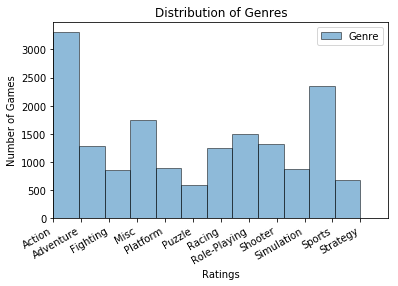

In [127]:
fig,ax = plt.subplots()

"Create a histogram that shows the distribution of age among respondents."
genre = videogames['Genre']
plt.hist(genre, alpha=.50, label='Genre', bins=12, ec="k")
plt.xlim(0,12)
plt.xlabel('Ratings')
plt.ylabel('Number of Games')
plt.title('Distribution of Genres')

# Add legend
plt.legend()

# Show the figure
fig.autofmt_xdate()
plt.show()

In [128]:
%%sql
SELECT COUNT(*)
FROM ProductSalesFact
WHERE Year = 1994;

Done.


COUNT(*)
121


In [129]:
%%sql
SELECT COUNT(*)
FROM ProductSalesFact
WHERE Year = 1995;

Done.


COUNT(*)
219


In [130]:
%%sql
SELECT *
FROM Region;

Done.


ProductID,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,82.74,41.49,29.02,3.77,8.46
2,40.24,29.08,3.58,6.81,0.77
3,35.82,15.85,12.88,3.79,3.31
4,33.0,15.75,11.01,3.28,2.96
5,31.37,11.27,8.89,10.22,1.0
6,30.26,23.2,2.26,4.22,0.58
7,30.01,11.38,9.23,6.5,2.9
8,29.02,14.03,9.2,2.93,2.85
9,28.62,14.59,7.06,4.7,2.26
10,28.31,26.93,0.63,0.28,0.47
